In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM,  GRU 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from collections import Counter
import itertools 
import re
%matplotlib inline 

In [2]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [4]:
maxlen = 200

In [5]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [6]:
x_train[5002]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  103,   51,   13,  197,   16,    6, 4796,
        239,    7,  107,  555,   11,  132,   39, 8921, 1872,  138,   16,
       4093, 1768, 2959,   34, 1620,    2,   11,    4,  755,   12,   43,
        286,    4,  172,  209,    2,    5, 5938,   17, 1000,   34, 1768,
        279,   29, 3892,   89,  338,    4,  114,   16, 1240, 1747,  103,
       3844, 3819,    8,  169, 2875,  112, 7062,   34,  160,  132,   29,
        100,   24,  535,  101,  250,    8,  858,   15,  196,   19,   57,
       3154,   39,   90,    5,   24,  169, 3533,   

In [7]:
imdb = keras.datasets.imdb
# Индексы словаря связи слов и соотвествующих им чисел
word_index = imdb.get_word_index()

# Первые индексы зарезервированы
word_index = {k:(v+3) for k,v in word_index.items()}
word_index[""] = 0
word_index[""] = 1
word_index[""] = 2 # unknown
word_index[""] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])




In [85]:
decode_review(x_train[2])

"? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

# With lemmatization

In [9]:

#lemmatization
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("english")
morph = MorphAnalyzer()
def lemmatize(doc):
    #doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split(): #doc
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

In [10]:
a = pd.DataFrame(np.array([lemmatize(decode_review(x_train[i])) for i in range(25000)]))
a['target'] = pd.Series(y_train)
a.columns = ['review', 'target']

In [11]:
b = pd.DataFrame(np.array([lemmatize(decode_review(x_test[i])) for i in range(25000)]))
b['target'] = pd.Series(y_test)
b.columns = ['review', 'target']

In [12]:
a.review = a.review.apply(lambda x: [i for i in x if i!='?'])
b.review = b.review.apply(lambda x: [i for i in x if i!='?'])

In [15]:
a

,review,target
0,"[could, imagine, robert, amazing, actor, direc...",1
1,"[big, hair, big, boobs, bad, music, giant, saf...",0
2,"[one, worst, films, 1990s, friends, watching, ...",0
3,"[death, parents, br, br, pulled, make, last, j...",1
4,"[worst, mistake, life, br, br, picked, movie, ...",0
...,...,...
24995,"[racist, movie, worthy, study, enjoyment, firs...",1
24996,"[movie, one, way, bela, used, sure, decent, en...",0
24997,"[far, away, galaxy, planet, called, native, pe...",0
24998,"[six, degrees, hooked, looked, forward, coming...",1


In [16]:
b

,review,target
0,"[please, give, one, miss, br, br, rest, cast, ...",0
1,"[psychological, interesting, robert, altman, d...",1
2,"[everyone's, horror, promptly, eats, mayor, go...",1
3,"[generally, love, type, movie, however, time, ...",0
4,"[like, people, wrote, i'm, die, hard, mario, f...",1
...,...,...
24995,"[kinds, love, ironic, film, really, one, love,...",1
24996,"[largest, crowd, ever, see, wrestling, event, ...",1
24997,"[suppose, say, terrible, movie, would, unfair,...",0
24998,"[love, 2, third, movie, seemed, creators, took...",0


In [17]:
c = a.append(b)

In [18]:
voc = c.drop(['target'], axis=1)

In [19]:
flattened = itertools.chain.from_iterable(c['review'].values)
words_flatten =[i for i in flattened]

In [20]:
c = Counter(words_flatten)

In [21]:
c['br']

140864

In [22]:
max_words = c.most_common(1)[0][1]+1

In [23]:
a.review = a.review.apply(lambda x: [c[i] for i in x])

In [24]:
b.review = b.review.apply(lambda x: [c[i] for i in x])

In [25]:
a

,review,target
0,"[11175, 1050, 1252, 1948, 3230, 5415, 2090, 21...",1
1,"[4670, 690, 4670, 73, 13980, 4879, 549, 99, 57...",0
2,"[36803, 4069, 9027, 57, 2425, 7002, 54677, 277...",0
3,"[2419, 1014, 140864, 140864, 360, 11637, 3864,...",1
4,"[4069, 523, 8644, 140864, 140864, 420, 66998, ...",0
...,...,...
24995,"[236, 66998, 593, 326, 206, 10496, 17727, 543,...",1
24996,"[66998, 36803, 10936, 99, 2649, 3869, 1675, 49...",0
24997,"[4177, 3778, 74, 508, 1786, 297, 12485, 54, 16...",0
24998,"[448, 55, 197, 1482, 940, 1470, 2027, 1417, 22...",1


In [26]:
b

,review,target
0,"[1787, 5235, 36803, 1349, 140864, 140864, 2517...",0
1,"[314, 4583, 1252, 107, 1464, 760, 2057, 207, 9...",1
2,"[138, 4802, 58, 109, 100, 3080, 54, 71, 104, 4...",1
3,"[542, 9451, 1607, 66998, 4549, 17727, 3664, 43...",0
4,"[28975, 12485, 712, 6722, 1125, 3746, 133, 282...",1
...,...,...
24995,"[236, 9451, 208, 54677, 17164, 36803, 9451, 34...",1
24996,"[41, 337, 8989, 17441, 164, 431, 4898, 1471, 3...",1
24997,"[566, 7693, 2584, 66998, 17604, 107, 5291, 139...",0
24998,"[9451, 4329, 909, 66998, 1933, 181, 1471, 951,...",0


In [27]:
listed_a = a.review.to_list()
listed_b = b.review.to_list()

In [28]:
X_train = pad_sequences(listed_a, maxlen=maxlen)
X_test = pad_sequences(listed_b, maxlen=maxlen)

In [29]:
X_train[148]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [30]:
X_train.shape

(25000, 200)

In [31]:
y_train.shape

(25000,)

In [75]:
model = Sequential()
model.add(Embedding(max_words, 15, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), 
              loss=keras.losses.binary_crossentropy, 
              metrics=['accuracy'])

In [77]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/10
88/88 [==============================] - 42s 472ms/step - loss: 0.5752 - accuracy: 0.6992 - val_loss: 0.4482 - val_accuracy: 0.7948
Epoch 2/10
88/88 [==============================] - 40s 454ms/step - loss: 0.4134 - accuracy: 0.8133 - val_loss: 0.4374 - val_accuracy: 0.8036
Epoch 3/10
88/88 [==============================] - 55s 627ms/step - loss: 0.3553 - accuracy: 0.8513 - val_loss: 0.4078 - val_accuracy: 0.8324
Epoch 4/10
88/88 [==============================] - 41s 469ms/step - loss: 0.3187 - accuracy: 0.8681 - val_loss: 0.3986 - val_accuracy: 0.8232
Epoch 5/10
88/88 [==============================] - 45s 509ms/step - loss: 0.2917 - accuracy: 0.8801 - val_loss: 0.3961 - val_accuracy: 0.8368
Epoch 6/10
88/88 [==============================] - 44s 505ms/step - loss: 0.2727 - accuracy: 0.8878 - val_loss: 0.4269 - val_accuracy: 0.8360
Epoch 7/10
88/88 [==============================] - 45s 511ms/step - loss: 0.2537 - accuracy: 0.8958 - val_loss: 0.4089 - val_accuracy: 0.8296

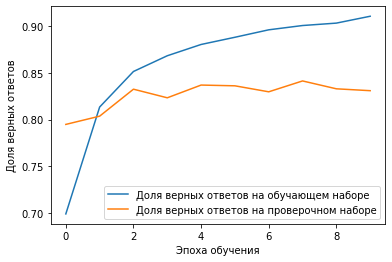

In [78]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [79]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 [==============================] - 30s 39ms/step - loss: 0.4230 - accuracy: 0.8332


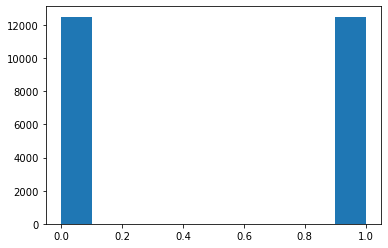

In [57]:
plt.hist(y_test); # 1 is positive 0 is negative

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
pred = model.predict(X_test)

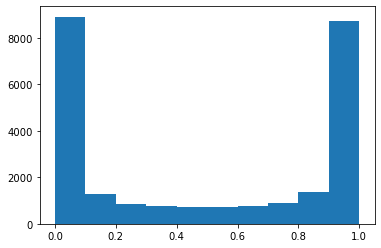

In [60]:
plt.hist(pred); #probas hist

In [61]:
pred = [round(pred[i][0]) for i in range(len(pred))]

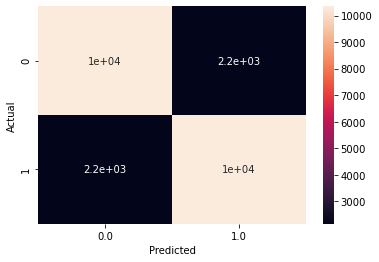

In [62]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_test,
        'y_Predicted': pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()


In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     12500
           1       0.83      0.83      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [100]:
testim = [ 'film', 'produce', 'actor', 'author', 'horrible']

In [101]:
testim = [[c[i] for i in testim]]

In [102]:
testim

[[54677, 300, 3230, 260, 1989]]

In [103]:
testim = pad_sequences(testim, maxlen=200)

In [104]:
model.predict(testim)

array([[0.4159096]], dtype=float32)

# word2vec for words in review

In [88]:
voc.review

0        [could, imagine, robert, amazing, actor, direc...
1        [big, hair, big, boobs, bad, music, giant, saf...
2        [one, worst, films, 1990s, friends, watching, ...
3        [death, parents, br, br, pulled, make, last, j...
4        [worst, mistake, life, br, br, picked, movie, ...
                               ...                        
24995    [kinds, love, ironic, film, really, one, love,...
24996    [largest, crowd, ever, see, wrestling, event, ...
24997    [suppose, say, terrible, movie, would, unfair,...
24998    [love, 2, third, movie, seemed, creators, took...
24999    [good, ol', boy, film, almost, required, car, ...
Name: review, Length: 50000, dtype: object

In [69]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(
    min_count=3,
    window=2,
    size=300,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)

In [70]:
w2v_model.build_vocab(voc.review)

In [71]:
w2v_model.train(voc.review, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(64306746, 113861910)

In [72]:
w2v_model.wv.most_similar(positive=["bad"])

[('awful', 0.688750147819519),
 ('terrible', 0.6741272807121277),
 ('horrible', 0.6663163304328918),
 ('good', 0.6317861080169678),
 ('worse', 0.5904549956321716),
 ('poor', 0.5864810347557068),
 ('acting', 0.5751830339431763),
 ('stupid', 0.5450389385223389),
 ('even', 0.5216548442840576),
 ('worst', 0.5138883590698242)]

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
def tsne_scatterplot(model, word, list_names):
    """Plot in seaborn the results from the t-SNE dimensionality reduction 
    algorithm of the vectors of a query word,
    its list of most similar words, and a list of words."""
    vectors_words = [model.wv.word_vec(word)]
    word_labels = [word]
    color_list = ['red']
    close_words = model.wv.most_similar(word)
    for wrd_score in close_words:
        wrd_vector = model.wv.word_vec(wrd_score[0])
        vectors_words.append(wrd_vector)
        word_labels.append(wrd_score[0])
        color_list.append('blue')
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.word_vec(wrd)
        vectors_words.append(wrd_vector)
        word_labels.append(wrd)
        color_list.append('green')
    # t-SNE reduction
    Y = (TSNE(n_components=2, random_state=0, perplexity=15, init="pca")
        .fit_transform(vectors_words))
    # Sets everything up to plot
    df = pd.DataFrame({"x": [x for x in Y[:, 0]],
                    "y": [y for y in Y[:, 1]],
                    "words": word_labels,
                    "color": color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    # Basic plot
    p1 = sns.regplot(data=df,
                    x="x",
                    y="y",
                    fit_reg=False,
                    marker="o",
                    scatter_kws={"s": 40,
                                "facecolors": df["color"]}
    )
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df["y"][line],
                " " + df["words"][line].title(),
                horizontalalignment="left",
                verticalalignment="bottom", size="medium",
                color=df["color"][line],
                weight="normal"
        ).set_size(15)
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))

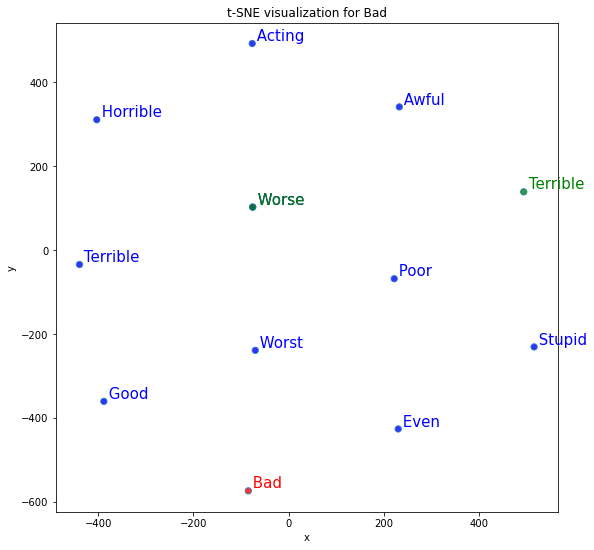

In [107]:
tsne_scatterplot(w2v_model, "bad", ["terrible", "worse"]) #как видим нужна лемматизщация  и стемматизация

In [ ]:
fgvsedfsdvdsvdsvdsvsdvsdvsdvsdvsdvsdsd

# ------------------------------------------------------------------------------------------------------------

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 15, input_length=maxlen))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1)

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

In [80]:
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [81]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [82]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/5
176/176 [==============================] - 13s 74ms/step - loss: 0.5652 - accuracy: 0.6735 - val_loss: 0.3599 - val_accuracy: 0.8440
Epoch 2/5
176/176 [==============================] - 13s 73ms/step - loss: 0.2760 - accuracy: 0.8888 - val_loss: 0.3059 - val_accuracy: 0.8752
Epoch 3/5
176/176 [==============================] - 13s 72ms/step - loss: 0.2043 - accuracy: 0.9226 - val_loss: 0.3533 - val_accuracy: 0.8728
Epoch 4/5
176/176 [==============================] - 13s 72ms/step - loss: 0.1620 - accuracy: 0.9419 - val_loss: 0.3366 - val_accuracy: 0.8668
Epoch 5/5
176/176 [==============================] - 12s 70ms/step - loss: 0.1309 - accuracy: 0.9562 - val_loss: 0.3483 - val_accuracy: 0.8628


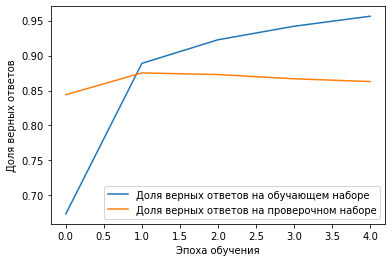

In [83]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [84]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 6s 8ms/step - loss: 0.3623 - accuracy: 0.8574


In [ ]:
def preprocessText(text):
    text = text.lower().replace("ё", "е")
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    text = re.sub('@[^\s]+', ' ', text)
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()